<p style="text-align: center;font-size: 40pt">Coordinate systems in 2D</p>

In [1]:
%matplotlib widget
# %matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import numpy as np

import ipywidgets as widgets

%run ./scripts/helper_func.py
path = "{0}/lessons/transformations_2d/scripts/helper_func.py".format(get_root_path())
%run $path
path = "{0}/lessons/transformations_3d/scripts/helper_func.py".format(get_root_path())
%run $path
path = "{0}/common/scripts/style.py".format(get_root_path())
%run $path

# Overview 

Objectives of this lesson:

- introduce part of the notations used later for 3D rigid transformation
- practice on problems that are easy to plot in 2D before moving to 3D


Hidden custom latex commands here $ \curvearrowright$

----
[comment]: <> (General commands)
$\newcommand{\textcomma}{\quad\text{,}}$
$\newcommand{\textdot}{\quad\text{.}}$
$\newcommand{\vec}[1]{\overrightarrow{#1}}$
$\newcommand{\mat}[1]{\mathbf{#1}}$
$\newcommand{\frame}[1]{\mathcal{#1}}$
$\newcommand{\point}[2][]{{}^{#1}\mathbf{#2}}$
$\newcommand{\pointsym}[2][]{{}^{#1}\boldsymbol{#2}}$
$\newcommand{\matsym}[1]{\boldsymbol{#1}}$
$\newcommand{\real}{\mathbb{R}}$
$\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}$
$\newcommand{\F}[2][]{{}_{#2}^{#1}\mathscr{F}}$
$\newcommand{\Fmat}[2][]{{}_{#2}^{#1}\mat{F}}$
$\newcommand{\origin}[2][]{{}_{#2}^{#1}\mat{o}}$
$\newcommand{\T}[2][]{{}_{#2}^{#1}\mat{T}}$
$\newcommand{\t}[2][]{{}_{#2}^{#1}\mat{t}}$
$\newcommand{\R}[2][]{{}_{#2}^{#1}\mat{R}}$
$\newcommand{\f}{\vec{\mathscr{f}}}$
$\newcommand{\ax}[2][]{{}_{#2}^{#1}\vec{\mathscr{x}}}$
$\newcommand{\ay}[2][]{{}_{#2}^{#1}\vec{\mathscr{y}}}$
$\newcommand{\az}[2][]{{}_{#2}^{#1}\vec{\mathscr{z}}}$
$\newcommand{\aw}[2][]{{}_{#2}^{#1}\vec{\mathscr{w}}}$
$\newcommand{\axi}{\mathscr{x}}$
$\newcommand{\ayi}{\mathscr{y}}$
$\newcommand{\azi}{\mathscr{z}}$
$\newcommand{\awi}{\mathscr{w}}$
$\newcommand{\pointx}[2][]{{}^{#1}{#2}_{\axi}}$
$\newcommand{\pointy}[2][]{{}^{#1}{#2}_{\ayi}}$
$\newcommand{\pointz}[2][]{{}^{#1}{#2}_{\azi}}$
$\newcommand{\SO}[1]{\mathrm{SO}(#1)}$
----

# Definitions

In this section, we will take our time to define something that looks simple: a point in space.
We will start by defining the space.

Our first coordinated system is the **Cartesian coordinate system**, which is an Euclidean space defined by an origin $\origin{}$ and a set $\F{}$ of orthogonal unit vectors $\f$ called **standard basis vectors**, such that

\begin{aligned}
\F{} = \{ \f_1, \f_2, \cdots, \f_d \} \quad \text{, with } \quad \| \f_i \| = 1, \forall i \in [1, \cdots, d]
\textdot
\end{aligned}

We can cast this generic definition to 2D (i.e., $d=2$), where $\f_1$ is commonly named $\ax{}$ and $\f_2$ named $\ay{}$, leading to

\begin{aligned}
\origin{}  &= \bmat{ 0 \\ 0 } \\
\F{} &= \{ \ax{}, \ay{} \} \quad \text{, with} \\
\ax{} &= \bmat{ 1 \\ 0 } 
\quad \text{ and } \quad \ay{} = \bmat{ 0 \\ 1 }
\textdot
\end{aligned}

From that definition, it should be clear that 

\begin{aligned}
\ax{} \cdot \ay{} = 0
\textcomma
\end{aligned}

where the operator ($\cdot$) is the [dot product](https://en.wikipedia.org/wiki/Dot_product).
We will also add a constrain by fixing the [determinant](https://en.wikipedia.org/wiki/Determinant) of a matrix composed of our standard basis vectors to be positive, such that

\begin{aligned}
\mathrm{det}\left(\bmat{ \ax{} & \ay{} }\right) &= \mathrm{det}\left(\bmat{ 1 & 0 \\ 0 & 1 }\right) \\
 &= 1 * 1 - 0 * 0\\
 &= +1
\textdot
\end{aligned}

Although it looks simplistic for now, a special care needs to be taken on the sign of the determinant.
We will see later that it defines the rotation direction.
In our case, a rotation from $\ax{}$ to $\ay{}$ is positive.
We use a special notation in the form of cursive letters for the basis vectors $\ax{}$ and $\ay{}$ to avoid confusion with a general $n \times 1$ matrix (vector) $\mat{x}$ and a scalar $x$ often used in linear algebra (e.g., $\mat{y} = \mat{A}\mat{x}$).

Then, we can define a **frame of reference** $\frame{A}$ as a set of basis vectors $\F{A}$ connected at the origin $\origin{A}$, leading to 

\begin{aligned}
\frame{A} &= \{ \F{A}, \origin{A} \}
\textdot
\end{aligned}

Finally, we can define **coordinates of a point** in that space $\point{p} \in \real^2$ containing scalars, such that

\begin{aligned}
\point{p} =
\begin{bmatrix}
p_\axi \\
p_\ayi
\end{bmatrix}
\textdot
\end{aligned}

Those coordinates represent an Euclidean vector $\vec{p}$, where each of the coordinates multiply its corresponding basis vectors, leading to 

\begin{aligned}
\vec{p} = \ax{} p_\axi + \ay{} p_\ayi
\textdot
\end{aligned}

This vector $\vec{p}$ has its tail at the origin $\origin{A}$ and its head at the coordinates $\point{p}$.
To recap, $\vec{p}$ is a vector and $\point{p}$ are coordinates of that vector, which is implicitly connected to $\origin{}$.

## Notation

For simplification of the notation, we will often omit the frame-specific name if there is only one frame where all the quantities are expressed, so we can simply use a set of basis vectors $\F{}$, an origin $\origin{}$, and a point $\point{p}$.
As we will see later, sometimes we need many frames of reference.
In these cases, we will use an explicit notation for a frame $\frame{A}$, where we have a set of basis vectors $\F{A}$, an origin $\origin{A}$, and a point $\point[A]{p}$.
This notation helps us to clarify sentences such as "a point $\point[A]{p}$ is expressed in a frame $\frame{A}$ as opposed to a point $\point[B]{p}$ expressed in $\frame{B}$".

The next two figures show all those variables in a complete drawing and the simplified version that will be used for the following section.

In [2]:
O = np.array([0.,0.])
x = np.array([1.,0.])
y = np.array([0.,1.])
p = np.array([2.,3.])
px = p[0]*x
py = p[1]*y


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# complet representation
draw_vector(axs[0], text=r"$ \vec{\mathscr{x}} p_\mathscr{x}$", 
            head=px, text_offset=(-0.2, -0.4))
draw_vector(axs[0], text=r"$ \vec{\mathscr{y}} p_\mathscr{y}$", 
            head=px+py, origin=px, text_offset=(0.1, -0.5))
draw_vector(axs[0], text=r"$\vec{p}$", 
            head=p, text_offset=(-0.5, -0.5))
draw_base_vector(axs[0], text=r"$ \vec{\mathscr{x}}$", 
                 head=x, color="tab:red", text_offset=(0., -0.1))
draw_base_vector(axs[0], head=y, text=r"$ \vec{\mathscr{y}}$", color="tab:green",
                ha='right',va='top', text_offset=(-0.1, 0))
axs[0].text(O[0], O[1], "$\mathscr{F}_{O}$", color = "tab:blue", size=30, ha='right',va='top')
clean_frame(axs[0], p, "A reference frame (complete)")

# simple representation
draw_frame(axs[1], name="$O$", color = "tab:blue")
draw_point(axs[1], p, text="${}^{O}\mathbf{p}$")
clean_frame(axs[1], p, "A reference frame (simplified)")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Then, we can define a point cloud as an **unordered** set of points, such that

\begin{aligned}
\mathcal{P} = \{\point{p}_1, \point{p}_2, \cdots, \point{p}_i \} \textcomma
\end{aligned}

with $|\mathcal{P}| = n$ (i.e., the set contains $n$ points).
Sometimes, we need to be more explicit about the frame of reference the point cloud is expressed in by using the notation ${}^A\mathcal{P}$ is a point cloud in frame $\frame{A}$.
A simple point cloud with four points would look like this.

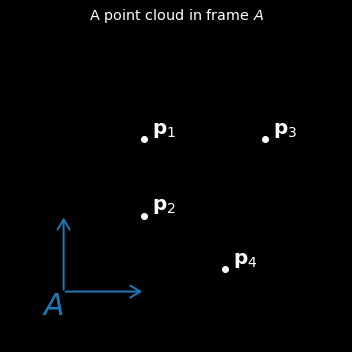

In [15]:
P = np.array([[1,2], [1,1], [2.5, 2.], [2,0.3]])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

draw_frame(ax, name="$A$", color = "tab:blue")

for i,p in enumerate(P):
    draw_point(ax, p, text="$\mathbf{p}_{" + str(i+1) + "}$", text_offset=(0.1, 0))

clean_frame(ax, P, "A point cloud in frame $A$")

## Homogeneous coordinates

Our second coordinate system is the **homogeneous coordinates** or projective coordinates.
This system has the particularity of being able to represent the infinity, which was not the case for the Cartesian coordinates.
Because it can represent one more element, an extra dimension is required.
For example, if Cartesian coordinates are used in 2D, we will need three dimensions for its equivalent homogeneous coordinates.
The reference frame for this system is defined as follows

\begin{aligned}
\origin{}  &= \bmat{ 0 \\ 0 \\ 1 } \\
\F{} &= \{ \ax{}, \ay{}, \aw{} \} \quad \text{, with} \\
\ax{} &= \bmat{ 1 \\ 0 \\ 0 } 
\quad \text{ , } \quad \ay{} = \bmat{ 0 \\ 1 \\ 0 }
\quad \text{ , and } \quad \aw{} = \bmat{ 0 \\ 0 \\ 1 }
\textdot
\end{aligned}

We can project a point $\point{p}_\text{homo}$ homogeneous coordinates to a point $\point{p}_\text{cart}$ Cartesian coordinates using

\begin{aligned}
\point{p}_\text{homo} = 
\bmat{
p_\axi \\
p_\ayi \\
\color{red}{p_\awi}\\
}
\mapsto
\point{p}_\text{cart} = 
\bmat{
\left(\frac{p_\axi}{\color{red}{p_\awi}}\right) \\
\left(\frac{p_\ayi}{\color{red}{p_\awi}}\right) \\
}
\textdot
\end{aligned}

The Cartesian coordinates are called the projective space, as we loose a dimension in the conversion.
With this definition, we can observe that any point $\point{p}_\text{homo}$ with $p_\awi=0$ will represent a point at infinity in Cartesian coordinates:

\begin{aligned}
\point{p}_\text{homo} = 
\bmat{
p_\axi \\
p_\ayi \\
0\\
}
\mapsto
\point{p}_\text{cart} = 
\bmat{
\infty \\
\infty \\
}
\textdot
\end{aligned}

It is also worth noting that homogeneous coordinates with all zeros are undefined in the projective space because of the zeros divided by a zero

\begin{aligned}
\point{p}_\text{homo} = 
\bmat{
0 \\
0 \\
0
}
\mapsto
\mathrm{undefined}
\textdot
\end{aligned}

This is why the origin of this frame is at $\bmat{0 & 0 & 1}^T$.

To explore this coordinate space, let us use a helix defined in homogeneous coordinates and see how it projects into the Cartesian coordinates.
Before playing with the graph, predict what will happen to the Cartesian frame when
- we stretch the helix in the direction of $\aw{}$?
- we force all $p_\awi$ to be ones?
- we stretch the helix toward the plane representing $p_\awi=0$?
- we stretch the helix under the plane representing $p_\awi=0$?

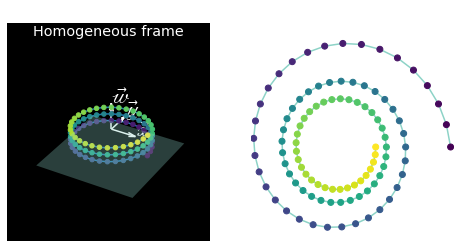

interactive(children=(FloatSlider(value=1.0, description='pw_max', max=5.5, min=-5.0), Output()), _dom_classes…

In [20]:
%matplotlib widget
# %matplotlib inline


origin = np.array([0,0,1])
x = np.array([1,0,0])
y = np.array([0,1,0])
w = np.array([0,0,1])

#plt.close(fig)
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121,projection="3d")

draw_3d_frame(ax1, origin=origin, text_z=r"$\vec{\mathscr{w}}$" )

ax1.set_xlim(-2, 2); ax1.set_ylim(-2, 2); ax1.set_zlim(-1, 3)
ax1.set_axis_off()
ax1.set_title("Homogeneous frame")

ax2 = fig.add_subplot(122)
draw_frame(ax2, text_x=r"$ \vec{\mathscr{x}}$", text_y=r"$ \vec{\mathscr{y}}$")
ax2.set_axis_off()
ax2.set_title("Cartesian frame")

# helix equations
n = 100
theta = np.linspace(-2*np.pi, 4*np.pi, n)
radius = 1.5

homo_x = radius*np.cos(theta)
homo_y = radius*np.sin(theta)
homo_w = np.linspace(0.4, 1.2, n)

ax1.plot3D(homo_x, homo_y, homo_w, "-", color="tab:blue")
scat3d = ax1.scatter(homo_x, homo_y, homo_w, c=homo_w, depthshade=False)

# draw plane for infinit values
size = 2.
px = np.array([-1., 1., 1., -1.])*size
py = np.array([1, 1, -1, -1])*size
pz = np.array([0,0,0,0])*size
plane = list(zip(px,py,pz))
ax1.add_collection3d(mplot3d.art3d.Poly3DCollection([plane], alpha=0.3))

# corresponding Cartesian coordinates
cart_x = homo_x/homo_w
cart_y = homo_y/homo_w

ax2.plot(cart_x, cart_y)
scat = ax2.scatter(cart_x, cart_y, c=homo_w, zorder=3)
s_range = (0.1, 5.5)
ax2.set_xlim((np.min([cart_x,cart_y])-0.1, np.max([cart_x,cart_y])+0.1))
ax2.set_ylim((np.min([cart_x,cart_y])-0.1, np.max([cart_x,cart_y])+0.1))

def update(pw_max=1.):
    global homo_x, cart_x, cart_y
    del ax1.lines[0]
    del ax2.lines[0]

    homo_w = np.linspace(1., pw_max, len(homo_x))
    ax1.plot3D(homo_x, homo_y, homo_w, "-", color="tab:blue")
    scat3d._offsets3d = np.array([homo_x, homo_y, homo_w])
    scat3d.set_array(homo_w)
    scat3d.set_clim((np.min(homo_w), np.max(homo_w)))

    keep_points = (homo_w != 0.)
    cart_x = homo_x[keep_points]/homo_w[keep_points]
    cart_y = homo_y[keep_points]/homo_w[keep_points]
    ax2.plot(cart_x, cart_y, color="tab:blue")
    print("Nb Cartesian coordinates: %i / %i" % (len(cart_x), len(homo_x)))
    scat.set_offsets(np.array([cart_x, cart_y]).T)
    scat.set_array(homo_w)
    scat.set_clim(np.min(homo_w), np.max(homo_w))
    fig.canvas.draw() #TODO find refreshing bug here

widgets.interact(update, pw_max = (-5., 5.5, 0.1), continuous_update=False);

There are infinite possibilities to convert from Cartesian to homogeneous coordinates, as any value of $p_\awi$ would satisfy our constraints.
Luckily, for point cloud manipulations, we limit ourself to a constant scale $p_\awi=1$ for all points, leading to the simple conversion from Cartesian to homogeneous 

\begin{aligned}
\point{p}_\text{cart} = 
\bmat{
p_\axi \\
p_\ayi \\
}
\mapsto
\point{p}_\text{homo} = 
\bmat{
p_\axi \\
p_\ayi \\
1\\
}
\textdot
\end{aligned}

The conversion is so trivial that we will not carry out any specific notation to differentiate both spaces, letting the context define the coordinate system. 
This context is often the dimensionality of the matrix in front of the point.

## Geometric quantities

Using two points $\point{p}$ and $\point{q}$, we can define some geometric quantities of interest:
- Location of a vector: the coordinates of $\point{p}$
$$p_\mathscr{x} \quad \text{and} \quad p_\mathscr{y}$$
- Vector length: 
$$l = \|\vec{p}\|$$
- Orientation of a vector: where the vector is pointing as a unit vector 
$$\vec{u} = \frac{\vec{p}}{ \|\vec{p}\|}$$
- Distance between vectors:
$$d = \|\vec{p} - \vec{q}\|$$
- Angle between vectors${}^\text{(1)}$: 
$$\theta = \arccos\left( \frac{\vec{p} \cdot \vec{q}}{\|\vec{p}\|\|\vec{q}\|} \right)$$
- Ratio of two vector lengths: 
$$r = \frac{\|\vec{p}\|}{\|\vec{q}\|}$$
- Area between three vectors${}^\text{(2)}$:
$$ a = \frac{1}{2}\mathrm{det}\left(\bmat{\vec{q} - \vec{p} & \vec{r} - \vec{p} }\right) $$

${}^\text{(1)}$Note here that the angle between two vectors is always positive as the function $\arccos(\cdot)$ is defined for the range $[0, \pi]$.

${}^\text{(2)}$Note that any area using more than three points could be used.
Using the [determinant of two points](https://en.wikipedia.org/wiki/Determinant#2_%C3%97_2_matrices) subtracted by a third one is just an easy way to compute an area with only two points.

Here is an example of those quantities.

p     =[2.  1.5]
q     =[2.5 5. ]
l_p   = 2.500
l_q   = 5.590
u_p   = [0.8 0.6]
u_q   = [0.45 0.89]
dist = 3.536
theta = 0.464
ratio = 0.447
area  = 3.800


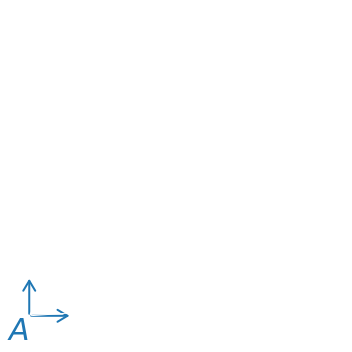

In [21]:
p = np.array([2, 1.5])
q = np.array([2.5, 5.])
r = np.array([4., 0.3])


l_p = np.linalg.norm(p)
l_q = np.linalg.norm(q)
u_p = p/l_p
u_q = q/l_q
dist = np.linalg.norm(p - q)
theta = np.arccos(np.dot(p,q)/(l_p*l_q))
ratio = l_p/l_q
area = 0.5*np.abs(np.linalg.det(np.vstack([q-p, r-p]).T))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

draw_frame(ax, name="$A$", color = "tab:blue")
draw_vector(ax, head=p, text=r"$\vec{p}$", text_offset=(-0.2, -0.9))
draw_vector(ax, head=q, text=r"$\vec{q}$", text_offset=(-0.3, 0))                       
draw_vector(ax, head=r, text=r"$\vec{r}$", text_offset=(-0.3, -0.9)) 
draw_angle_vectors(ax, p, v2=q, radius=1.)
triangle = np.vstack([p, q, r])
ax.add_patch(plt.Polygon(triangle, color='white', alpha=0.2))
clean_frame(ax, [p, q, p+q], "Some geometric quantities")

print("p     =" +str(p))
print("q     =" +str(q))
print("l_p   = %.3f" %l_p)
print("l_q   = %.3f" %l_q)
print("u_p   = "  + str(u_p))
print("u_q   = "  + str(u_q))
print("dist = %.3f" %dist)
print("theta = %.3f" %theta)
print("ratio = %.3f" %ratio)
print("area  = %.3f" %area)


# Conclusion

You should do the following activities to enhance your understanding of the concepts viewed in this lesson:
- play with the Python scripts provided;
- do the [exercises](../../exercises/ex_transformations_2d/1e-exercises_coordinates.ipynb) related to this lesson, they are necessary to connect concepts;
- modify the markdown by adding your own notes using `> my notes`; and
- complete the tables [Symbol definitions](#Symbol-definitions) and [Glossary](#Glossary) and add your own definitions.

Next lesson:
- [Transformation functions in 2D](2-lesson_transformation.ipynb)

## Symbol definitions

| Symbol             | Definition            |
|--------------------|-------------          |
| $\frame{A}$        | A frame of reference  |
| $\F{A}$            | set of basis vector of the frame of reference $\frame{A}$       |
| $\f$               | basis vector          |
| $\ax{}$ and $\ay{}$| 2D basis vector       |
| $x$                | scalar                |
| $\vec{x}$          | vector                |
| $\mat{X}$          | matrix                |
| $\point{x}$        | coordinates of a point|
| $x_i$              | $i^{\text{th}}$ scalar of a set                |
| $\real$            | real set              |
| $\in$              | ... is part of ...    |
| $\point{a}\cdot\point{b}$            | dot product           |
| $\|\vec{x}\|$      | Euclidean norm of a vector $\vec{x}$      |
| ...                |                       |

## Glossary

| English               | Français        | Definition |
|-----------            |------------     |------------|
| frame of reference    | référentiel     |            |
| basis vector          | vecteur de base |            |
| ...                   |                 |            |